In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/Users/annaventimiglia/Downloads/xgtutorial.csv')

In [3]:
df

,Unnamed: 0,minute,team,xG,player,result
0,0,1,Southampton,0.105402,Nathan Redmond,BlockedShot
1,1,2,Southampton,0.136320,Jan Bednarek,BlockedShot
2,2,2,Southampton,0.037217,Oriol Romeu,BlockedShot
3,3,2,Southampton,0.021404,James Ward-Prowse,BlockedShot
4,4,3,Southampton,0.066363,Pierre-Emile Højbjerg,BlockedShot
5,5,9,Southampton,0.363826,Nathan Redmond,SavedShot
6,6,11,Southampton,0.354095,Shane Long,Goal
7,7,17,Southampton,0.036274,Nathan Redmond,MissedShots
8,8,21,Southampton,0.076804,Danny Ings,MissedShots
9,9,23,Southampton,0.380378,Shane Long,SavedShot


In [36]:
#Creating lists for the data to make it easier to plot
#Starting the flow at 0 so it doesn't start when the first shot happened
a_xG = [0]
h_xG = [0]
a_min = [0]
h_min = [0]

#Home and away team
hteam = df['team'].iloc[0]
ateam = df['team'].iloc[-1]

for x in range(len(df['xG'])):
    if df['team'][x] == ateam:
        a_xG.append(df['xG'][x])
        a_min.append(df['minute'][x])
    if df['team'][x] == hteam:
        h_xG.append(df['xG'][x])
        h_min.append(df['minute'][x])

In [5]:
a_xG

[0,
 0.5160688757896423,
 0.016306834295392,
 0.515467643737793,
 0.0256478916853666,
 0.0349417366087436,
 0.0174072794616222,
 0.9731016159057616,
 0.5066826343536377,
 0.0249238740652799]

In [40]:
a_goal_min = []
h_goal_min = []
y_a_goal_min = []
y_h_goal_min = []

for x in range(len(df['result'])):
    if df['team'][x] == ateam and df['result'][x] == 'Goal':
        a_goal_min.append(df['minute'][x])
        y_a_goal_min.append(0)
    if df['team'][x] == hteam and df['result'][x] == 'Goal':
        h_goal_min.append(df['minute'][x])
        y_h_goal_min.append(0)

In [41]:
y_a_goal_min

[0, 0, 0]

In [7]:
#Function to sum the numbers within the list cumulatively
def nums_cumulative_sum(nums_list):
    return [sum(nums_list[:i+1]) for i in range(len(nums_list))]

a_cumulative = nums_cumulative_sum(a_xG)
h_cumulative = nums_cumulative_sum(h_xG)

In [8]:
a_cumulative

[0,
 0.5160688757896423,
 0.5323757100850344,
 1.0478433538228273,
 1.073491245508194,
 1.1084329821169376,
 1.1258402615785599,
 2.0989418774843216,
 2.6056245118379593,
 2.6305483859032393]

In [9]:
a_total = round(a_cumulative[-1],2)
h_total = round(h_cumulative[-1],2)

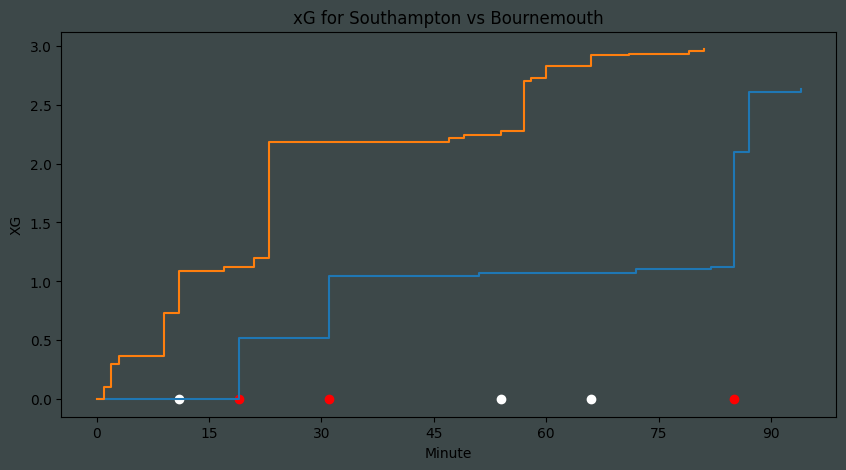

In [42]:
fig, ax = plt.subplots(figsize=(10,5))
fig.set_facecolor('#3d4849')
ax.patch.set_facecolor('#3d4849')

plt.xticks([0,15,30,45,60,75,90])
plt.xlabel('Minute')
plt.ylabel('XG')
plt.title('xG for Southampton vs Bournemouth')

#post makes it go flat horizontally 
ax.step(x=a_min,y=a_cumulative,where='post')
ax.step(x=h_min,y=h_cumulative,where='post')

#Create a scatterplot for when goals occurred
ax.scatter(x=a_goal_min,y=y_a_goal_min,c='red')
ax.scatter(x=h_goal_min,y=y_h_goal_min,c='white')